# API Docs

**Development:** <br>
<https://api.radiomemory.com.br/ia-dev/api/v1/docs> <br>
<https://api.radiomemory.com.br/ia-dev/api/v1/redoc>

**Production:** (Not avaliable yet): <br>
<https://api.radiomemory.com.br/ia/api/v1/docs> <br>
<https://api.radiomemory.com.br/ia/api/v1/redoc>

**This Page Direct Link:** <br>
<https://api.radiomemory.com.br/ia-dev/api/v1/examples/main> <br>

**This Page Source Code:** <br>
https://github.com/Radio-Memory/radiomemory-ai-api-demo

In [1]:
import config as cfg
import requests
import cv2
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import pprint

pp = pprint.PrettyPrinter(indent=4)

BASE_URL = "https://api.radiomemory.com.br/ia-dev/api/v1"

def encode_image(image):

    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    image64 = base64.b64encode(buffered.getvalue())
    return image64.decode()

# Authentication

In [2]:
response = requests.post(
        BASE_URL + "/auth/token",
        data={
            "username": cfg.USERNAME,
            "password": cfg.PASSWORD,
        },
    )
token = response.json()["access_token"]
headers = {"Authorization": "Bearer %s" % token}

# Panoramics

In [5]:
# The image is converted to grayscale in the backend, so you can convert it before sending in order to save bandwidth.
panoramic_image = Image.open("images/panoramic0.jpg").convert("L")

## Dentition Endpoint

Classify the panoramic radiography in either toothless, superior toothless, inferior toothless, mixed or "normal".

In [4]:
dentition_response = requests.post(
        BASE_URL + "/panoramics/dentition",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

In [5]:
pdata = dentition_response.json()
pdata["entities"] = pdata["entities"][:4]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'normal',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 1.0,
                        'tooth': None,
                        'type': 'dentition'},
                    {   'bbox': None,
                        'class_name': 'superior_toothless',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 7.882029473549323e-10,
                        'tooth': None,
                        'type': 'dentition'},
                    {   'bbox': None,
                        'class_name': 'mixed',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 2.5856181778971532e-11,
                        'tooth': None,
                 

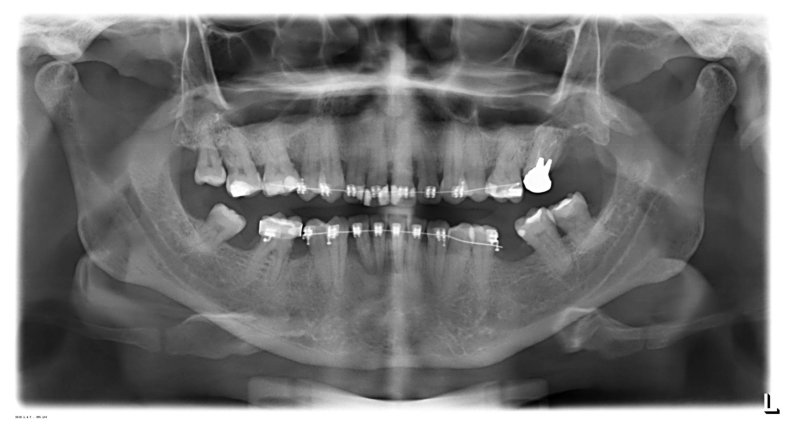

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(panoramic_image, cmap="gray")
ax.axis("off");

## Longaxis Endpoint

Returns a point coordinates for the crown and the root of every tooth in the panoramic image.

In [31]:
longaxis_response = requests.post(
        BASE_URL + "/panoramics/longaxis",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [32]:
pdata = longaxis_response.json()
pdata["entities"] = pdata["entities"][:3]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '18_0',
                        'contour': None,
                        'line': None,
                        'point': [632.8214285714287, 553.7142857142857],
                        'score': 0.5159811526536942,
                        'tooth': None,
                        'type': 'longaxis'},
                    {   'bbox': None,
                        'class_name': '18_1',
                        'contour': None,
                        'line': None,
                        'point': [611.0, 351.83928571428567],
                        'score': 0.5159811526536942,
                        'tooth': None,
                        'type': 'longaxis'},
                    {   'bbox': None,
                        'class_name': '17_0',
                        'contour': None,
                        'line': None,
                        'point': [752.8392857142858, 594.0892857142857],
                        'scor

### Visualization

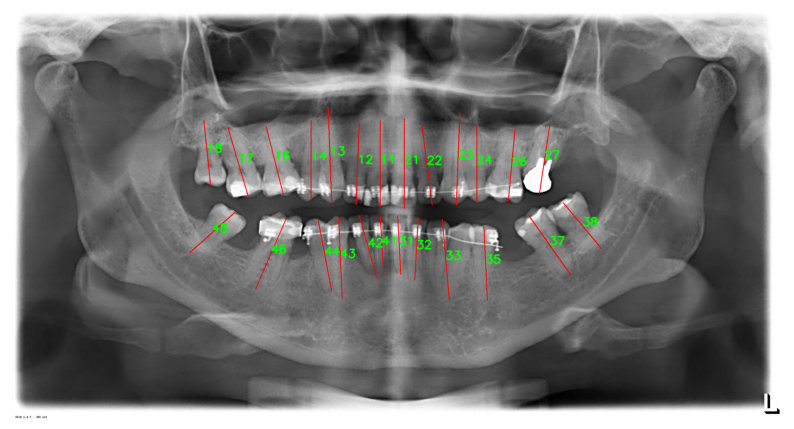

In [33]:
from vis import draw_longaxis_output

dimage = draw_longaxis_output(panoramic_image, longaxis_response.json()["entities"], draw_axis=True)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Panorogram Endpoint

Returns the panorogram curves of the panoramic image.

In [34]:
panorogram_response = requests.post(
        BASE_URL + "/panoramics/panorogram",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [35]:
pdata = panorogram_response.json()
pdata["entities"] = [{**p, "contour": p["contour"][:3]} for p in pdata["entities"][:2]]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'ContMand',
                        'contour': [[150, 179], [149, 180], [148, 180]],
                        'line': None,
                        'point': None,
                        'score': None,
                        'tooth': None,
                        'type': 'panorogram'},
                    {   'bbox': None,
                        'class_name': 'CanManDir',
                        'contour': [[386, 547], [385, 548], [384, 548]],
                        'line': None,
                        'point': None,
                        'score': None,
                        'tooth': None,
                        'type': 'panorogram'}],
    'height': 1292,
    'image_hash': None,
    'width': 2444}


### Visualization

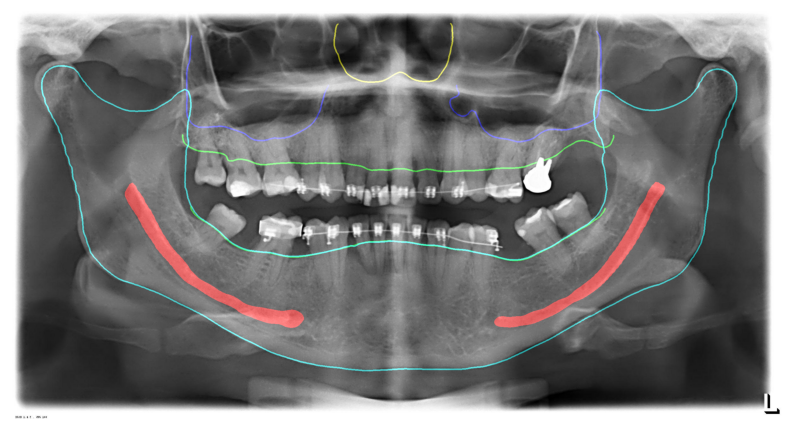

In [36]:
from vis import draw_panorogram
dimage = draw_panorogram(panoramic_image, [[p["class_name"], p["contour"]] for p in panorogram_response.json()["entities"]])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Metals Endpoint

Returns metal structures found on the panoramic image.

In [37]:
metals_response = requests.post(
        BASE_URL + "/panoramics/metals",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Sample Output

In [38]:

pp.pprint(metals_response.json())

{   'entities': [   {   'bbox': [   860.0716552734375,
                                    624.821044921875,
                                    1569.6455078125,
                                    783.9153442382812],
                        'class_name': 'ortodontia',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.9565339088439941,
                        'tooth': None,
                        'type': 'metals'},
                    {   'bbox': [   800.8220825195312,
                                    469.63043212890625,
                                    1654.4957275390625,
                                    637.3797607421875],
                        'class_name': 'ortodontia',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.8314669132232666,
                        'tooth'

### Visualization

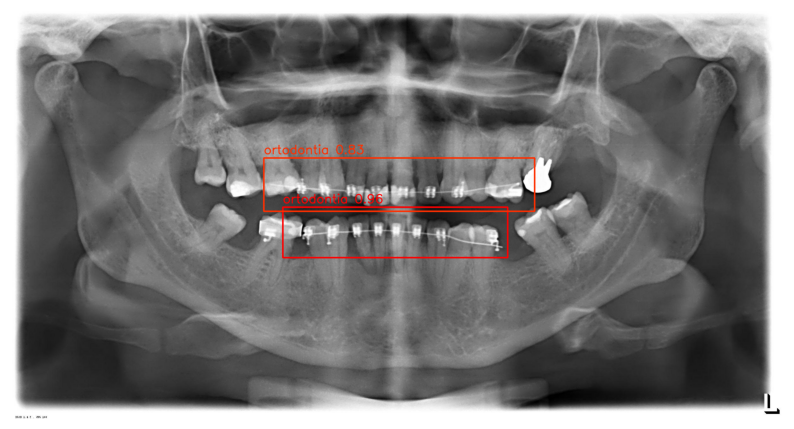

In [39]:
from vis import draw_bboxes

dimage = draw_bboxes(panoramic_image, metals_response.json()["entities"])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Teeth Segmentation Endpoint

Return a segmentation mask in the form of a contour for each found tooth on the panoramic image.

In [40]:
teeth_segmentation_response = requests.post(
        BASE_URL + "/panoramics/teeth-segmentation",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [41]:
teeth_segmentation_response

<Response [200]>

In [42]:
pdata = teeth_segmentation_response.json()
pdata["entities"] = [{**p, "contour": p["contour"][:3]} for p in pdata["entities"][:3]]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '18',
                        'contour': [[608, 355], [607, 356], [606, 356]],
                        'line': None,
                        'point': None,
                        'score': None,
                        'tooth': None,
                        'type': 'teeth_segmentation'},
                    {   'bbox': None,
                        'class_name': '17',
                        'contour': [[701, 370], [700, 371], [699, 371]],
                        'line': None,
                        'point': None,
                        'score': None,
                        'tooth': None,
                        'type': 'teeth_segmentation'},
                    {   'bbox': None,
                        'class_name': '16',
                        'contour': [[828, 362], [827, 363], [826, 363]],
                        'line': None,
                        'point': None,
                        'score': None,

### Visualization

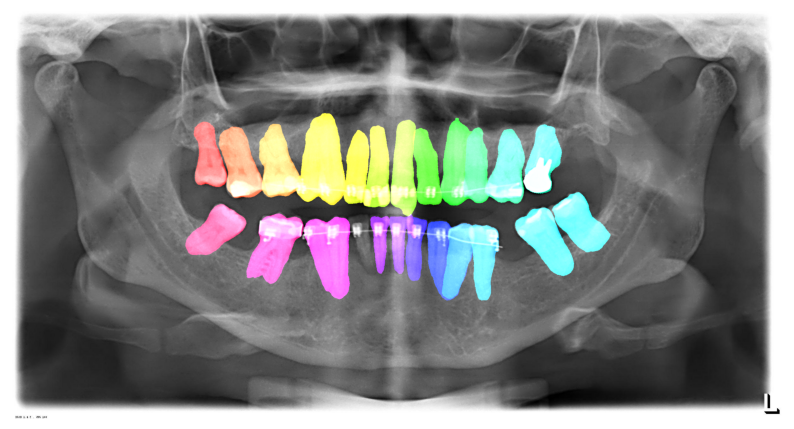

In [43]:
from vis import contour2mask, draw_masks

contours_list = [[p["contour"]] for p in teeth_segmentation_response.json()["entities"]]
masks = [contour2mask(contour, *panoramic_image.size) for contour in contours_list]
dimage = draw_masks(panoramic_image, masks)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Procedures Endpoint

Returns dental proceadures found on the panoramic image.

In [44]:
procedures_response = requests.post(
        BASE_URL + "/panoramics/procedures",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [45]:
pdata = procedures_response.json()
pdata["entities"] = pdata["entities"][:1]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'MatRestCoron',
                        'contour': None,
                        'line': [   [632.8214285714287, 553.7142857142857],
                                    [611.0, 351.83928571428567]],
                        'point': None,
                        'score': 0.6624749302864075,
                        'tooth': '18',
                        'type': 'procedure'}],
    'height': 1292,
    'image_hash': None,
    'width': 2444}


### Visualization

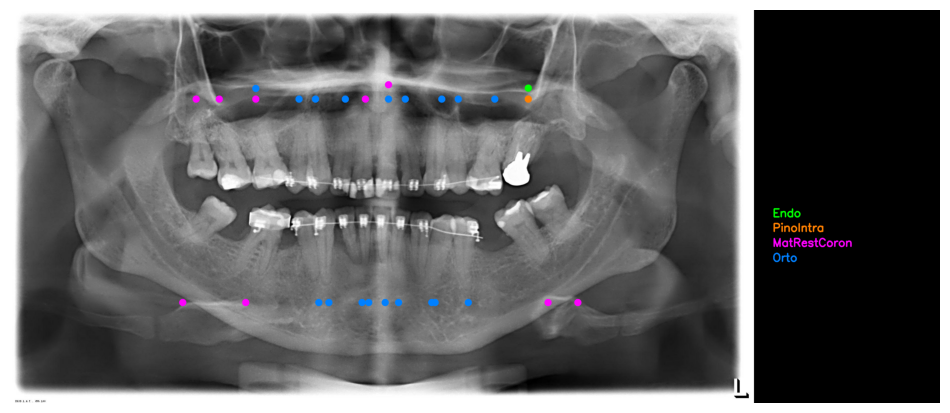

In [46]:
from vis import draw_procedures_output

dimage = draw_procedures_output(panoramic_image, [e for e in procedures_response.json()["entities"] if e["score"] > 0.5])
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(dimage)
ax.axis("off");

## Describe Endpoint

The describe endpoint will return the result of all models at once.  
The models can be called individually from the endpoints described in the docs.

In [10]:
describe_response = requests.post(
        BASE_URL + "/panoramics/describe",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

### Output Sample

In [48]:
pdata = describe_response.json()
pdata["entities"] = pdata["entities"][:3]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': 'normal',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 1.0,
                        'tooth': None,
                        'type': 'dentition'},
                    {   'bbox': None,
                        'class_name': 'superior_toothless',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 7.882029473549323e-10,
                        'tooth': None,
                        'type': 'dentition'},
                    {   'bbox': None,
                        'class_name': 'mixed',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 2.5856181778971532e-11,
                        'tooth': None,
                 

## Anomalies Heatmap Endpoint

Returns a heatmap of the anomalies found on the panoramic image.

In [6]:
anomalies_response = requests.post(
        BASE_URL + "/panoramics/teeth-anomalies-heatmap",
        json={
            "base64_image": encode_image(panoramic_image),
        },
        headers=headers,
    )

In [14]:
anomalies_response.json()

[{'tooth_name': '18',
  'anomalies': [{'cropped_heatmap': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAGAAQBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APGDiv/Z',
    'bbox_xywh': [628, 491, 4, 6],
    'image_width': 2444,
    'image_height': 1292,
    'anomaly_name': 'NodP'}]},
 {'tooth_name': '17',
  'anomalies': [{'cropped_heatmap': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAVAA4BAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3

In [34]:
# Found classes:
for idx, data in enumerate(anomalies_response.json()):
    if idx > 7:
        break
    if len(data["anomalies"]) == 0:
        continue
    print(f"Tooth {data['tooth_name']}  Anomalies -" + ", ".join([anno["anomaly_name"] for anno in data["anomalies"]]), end=" ")
    print("\n")

Tooth 18  Anomalies -NodP 

Tooth 17  Anomalies -Calc, NodP, Car 

Tooth 16  Anomalies -Calc, NodP, Car 

Tooth 13  Anomalies -Calc 

Tooth 12  Anomalies -Calc, Car 

Tooth 11  Anomalies -Calc, Car 

Tooth 21  Anomalies -Calc, Car 



### Visualization

Visualizing the `Calc` class.

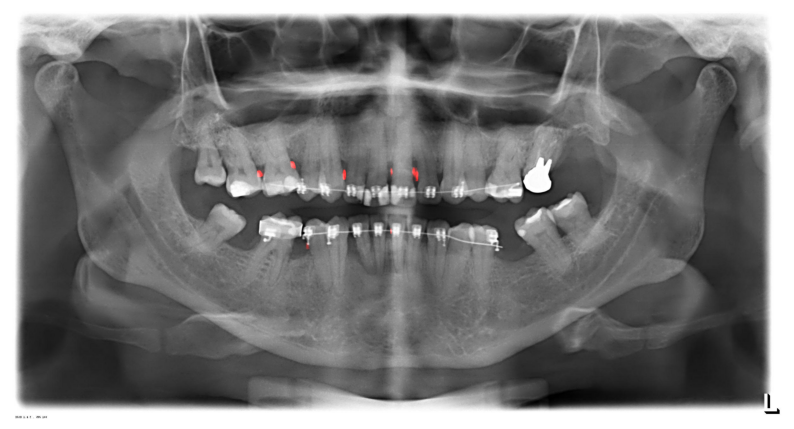

In [9]:
from utils import process_ret_api
from vis import draw_heatmap

heatmap = process_ret_api(anomalies_response.json(), h=panoramic_image.height, w=panoramic_image.width, anomaly2see="Calc")
dimage = draw_heatmap(panoramic_image, heatmap)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

# Periapicals

In [49]:
# The image is converted to grayscale in the backend, so you can convert it before sending in order to save bandwidth.
periapical_image = Image.open("images/periapical0.jpg").convert("L")

### Classify Endpoint

The classify endpoint will return the periapical type among the 14 possible regions.

In [50]:
classify_response = requests.post(
        BASE_URL + "/periapicals/classify",
        json={
            "base64_image": encode_image(periapical_image),
        },
        headers=headers,
    )

### Output Sample

In [51]:
pdata = classify_response.json()
pdata["entities"] = pdata["entities"][:4]
pp.pprint(pdata)

{   'entities': [   {   'bbox': None,
                        'class_name': '42-41-31-32',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.9996941089630127,
                        'tooth': None,
                        'type': 'periapical_classification'},
                    {   'bbox': None,
                        'class_name': '33',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 0.0002522027643863112,
                        'tooth': None,
                        'type': 'periapical_classification'},
                    {   'bbox': None,
                        'class_name': '43',
                        'contour': None,
                        'line': None,
                        'point': None,
                        'score': 3.3788826840464026e-05,
                       

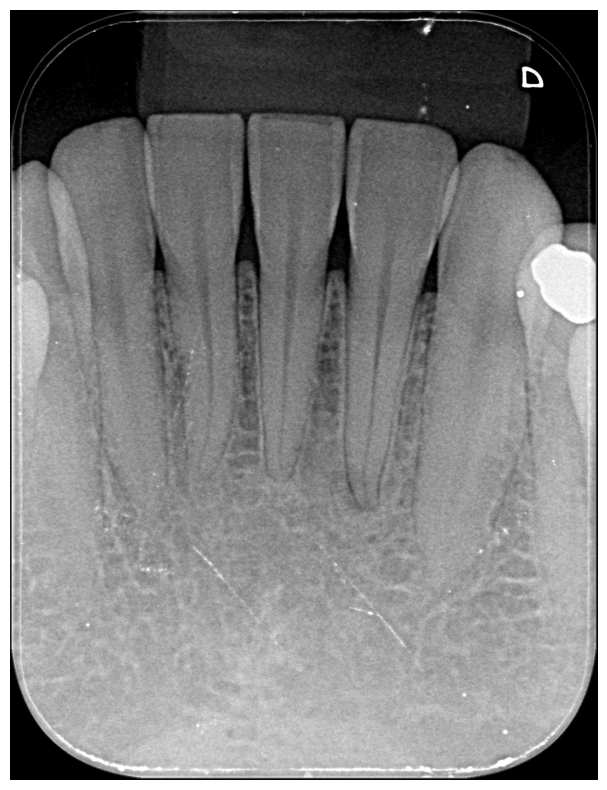

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(periapical_image, cmap="gray")
ax.axis("off");